# Statistics Tutorial

Hi fellow Kagglers,

This notebook is a gentle tutorial to essential concepts in statistics. I try to present the concepts in a fun and interactive way and I encourage you to play with the code to get a better grasp of the concepts.

![](https://i.stack.imgur.com/c88K3.png)

## Table of contents

- [Preparation](#1)
- [Discrete and Continuous Variables](#2)
  - PMF (Probability Mass Function)
  - PDF (Probability Density Function)
  - CDF (Cumulative Distribution Function)
- [Distributions](#3)
  - Uniform Distribution
  - Normal Distribution
  - Binomial Distribution
  - Poisson Distribution
  - Log-normal Distribution
- [Summary Statistics and Moments](#4)
- [Bias, MSE and SE](#5)
- [Sampling Methods](#6)
- [Covariance](#7)
- [Correlation](#8)
- [Linear Regression](#9)
  - Anscombe's Quartet
- [Bootstrapping](#10)
- [Hypothesis Testing](#11)
  - p-value
  - q-q plot
- [Outliers](#12)
  - Grubbs Test
  - Tukey's Method
- [Overfitting](#20)
  - Prevention of Overfitting
  - Cross-Validation
- [Generalized Linear Models (GLMs)](#13)
  - Link Functions
  - Logistic Regression
- [Frequentist vs. Bayes](#14)
- [Bonus: Free Statistics Courses](#15)
- [Sources](#16)

## Preparation <a id="1"></a>

In [2]:
# Dependencies

# Standard Dependencies
import os
import numpy as np
import pandas as pd
from math import sqrt

# Visualization
from pylab import *
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns

# Statistics
from statistics import median
from scipy import signal
from scipy.special import factorial
import scipy.stats as stats
from scipy.stats import sem, binom, lognorm, poisson, bernoulli, spearmanr
from scipy.fftpack import fft, fftshift

# Scikit-learn for Machine Learning models
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Read in csv of Toy Dataset
# We will use this dataset throughout the tutorial
df = pd.read_csv(r'C:\Users\kumar\.vscode\FULLSTACK DATASCIENCE\ML STATICS\Complete Statics with visualization\toy_dataset.csv')

## Discrete and Continuous Variables <a id="2"></a>

A discrete variable is a variable that can only take on a certain number of values. If you can count a set of items, then it’s a discrete variable. An example of a discrete variable is the outcome of a dice. It can only have 1 of 6 different possible outcomes and is therefore discrete.

A continuous variable can take on an infinite number of values. An example of a continuous variable is length. Length can be measured to an arbitrary degree and is there continuous.

In statistics we represent a distribution of discrete variables with PMF's (Probability Mass Functions) and CDF's (Cumulative Distribution Functions). We represent distributions of continuous variables with PDF's (Probability Density Functions) and CDF's. 

The PMF defines the probability of all possible values x of the random variable. A PDF is the same but for continuous values.
The CDF represents the probability that the random variable X will have an outcome less or equal to the value x. The name CDF is used for both discrete and continuous distributions.

The functions that describe PMF's, PDF's and CDF's can be quite daunting at first, but their visual counterparts look quite intuitive.

### PMF (Probability Mass Function)


Here we visualize a PMF of a binomial distribution. You can see that the possible values are all integers. For example, no values are between 50 and 51. 

The PMF of a binomial distribution in function form:

![](http://reliabilityace.com/formulas/binomial-pmf.png)

See the "[Distributions](#3)" section for more information on binomial distributions.

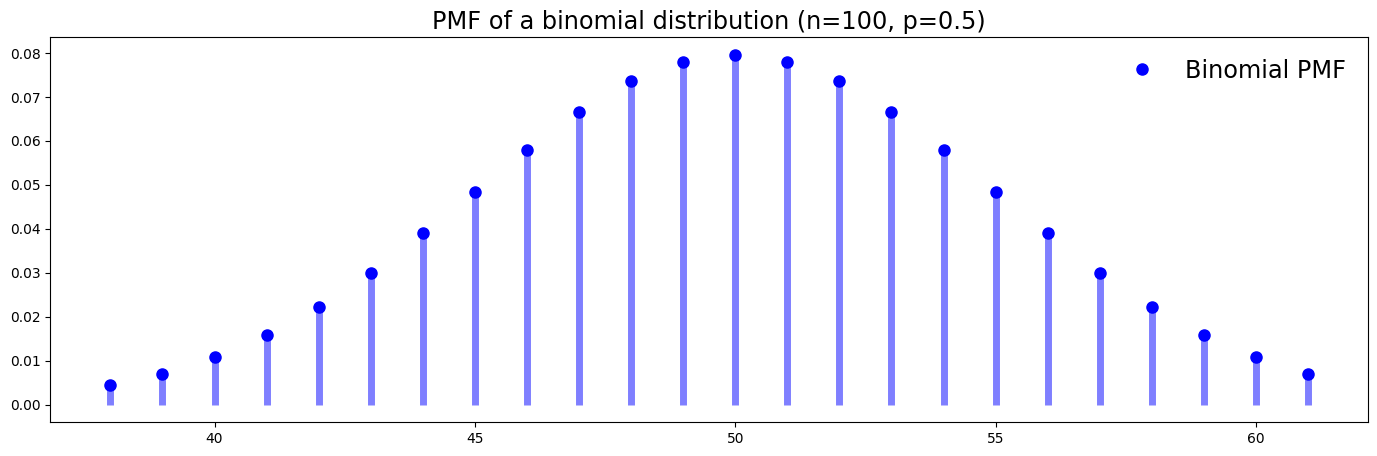

In [3]:
# PMF Visualization
n = 100
p = 0.5

fig, ax = plt.subplots(1, 1, figsize=(17,5))
x = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p))
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='Binomial PMF')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)
rv = binom(n, p)
#ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1, label='frozen PMF')
ax.legend(loc='best', frameon=False, fontsize='xx-large')
plt.title('PMF of a binomial distribution (n=100, p=0.5)', fontsize='xx-large')
plt.show()

### PDF (Probability Density Functions)

The PDF is the same as a PMF, but continuous. It can be said that the distribution has an infinite number of possible values. Here we visualize a standard normal distribution with a mean of 0 and standard deviation of 1.

PDF of a normal distribution in formula form:

![](https://www.mhnederlof.nl/images/normalpdf.jpg)


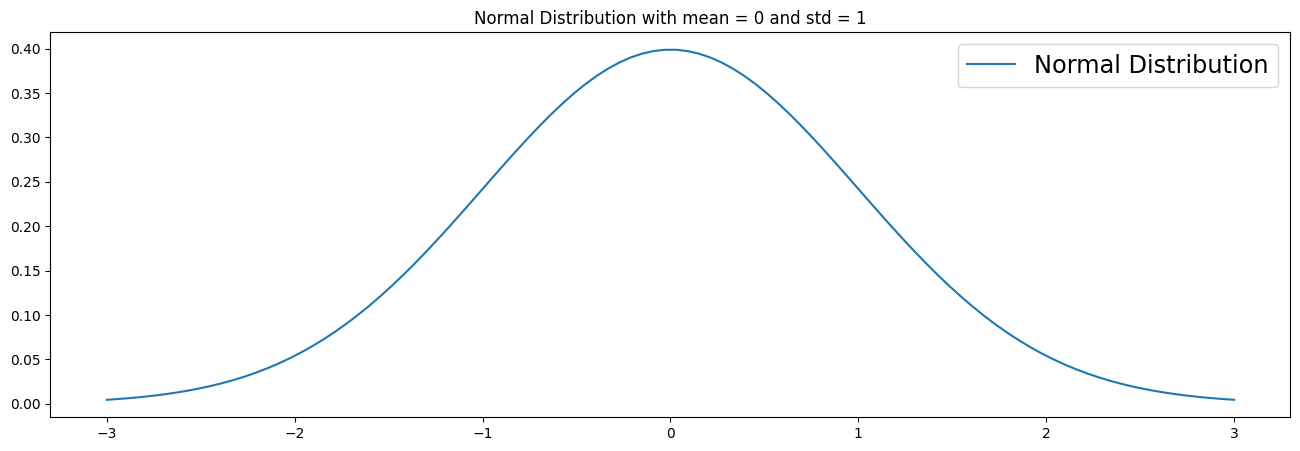

In [4]:
# Plot normal distribution
mu = 0
variance = 1
sigma = sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.figure(figsize=(16,5))
plt.plot(x, stats.norm.pdf(x, mu, sigma), label='Normal Distribution')
plt.title('Normal Distribution with mean = 0 and std = 1')
plt.legend(fontsize='xx-large')
plt.show()

### CDF (Cumulative Distribution Function)

The CDF maps the probability that a random variable X will take a value of less than or equal to a value x (P(X ≤  x)). CDF's can be discrete or continuous. In this section we visualize the continuous case. You can see in the plot that the CDF accumulates all probabilities and is therefore bounded between 0 ≤ x ≤ 1.

The CDF of a normal distribution as a formula:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/187f33664b79492eedf4406c66d67f9fe5f524ea)

*Note: erf means "[error function](https://en.wikipedia.org/wiki/Error_function)".*

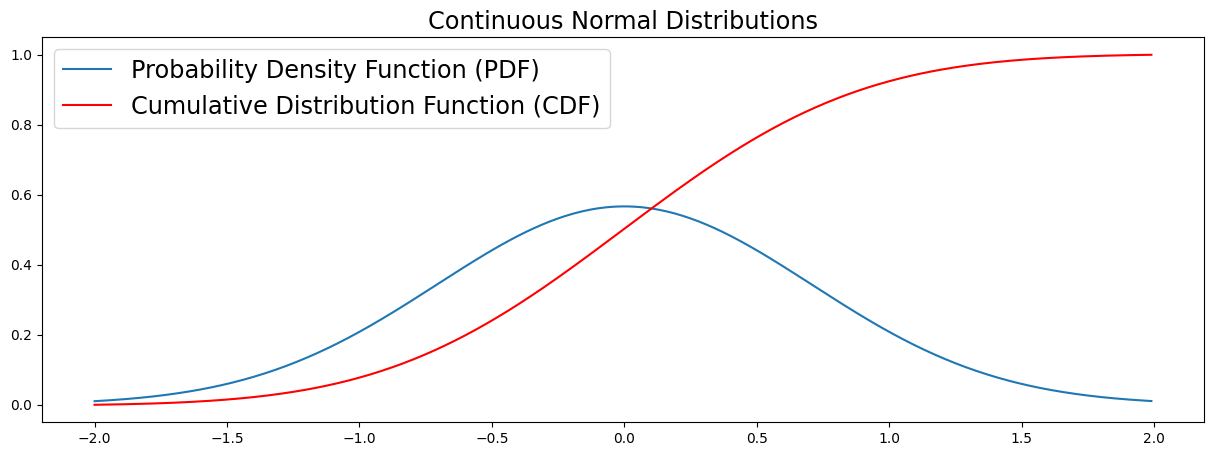

In [5]:
# Data
X  = np.arange(-2, 2, 0.01)
Y  = exp(-X ** 2)

# Normalize data
Y = Y / (0.01 * Y).sum()

# Plot the PDF and CDF
plt.figure(figsize=(15,5))
plt.title('Continuous Normal Distributions', fontsize='xx-large')
plot(X, Y, label='Probability Density Function (PDF)')
plot(X, np.cumsum(Y * 0.01), 'r', label='Cumulative Distribution Function (CDF)')
plt.legend(fontsize='xx-large')
plt.show()

## Distributions <a id="3"></a>

A Probability distribution tells us something about the likelihood of each value of the random variable.

A random variable X is a function that maps events to real numbers.

The visualizations in this section are of discrete distributions. Many of these distributions can however also be continuous.

### Uniform Distribution

A Uniform distribution is pretty straightforward. Every value has an equal change of occuring. Therefore, the distribution consists of random values with no patterns in them. In this example we generate random floating numbers between 0 and 1.

The PDF of a Uniform Distribution:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/648692e002b720347c6c981aeec2a8cca7f4182f)

CDF:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/eeeeb233753cfe775b24e3fec2f371ee8cdc63a6)

In [6]:
# Uniform distribution (between 0 and 1)
uniform_dist = np.random.random(1000)
uniform_df = pd.DataFrame({'value' : uniform_dist})
uniform_dist = pd.Series(uniform_dist)

Text(0.5, 1.0, 'Scatterplot of a Random/Uniform Distribution')

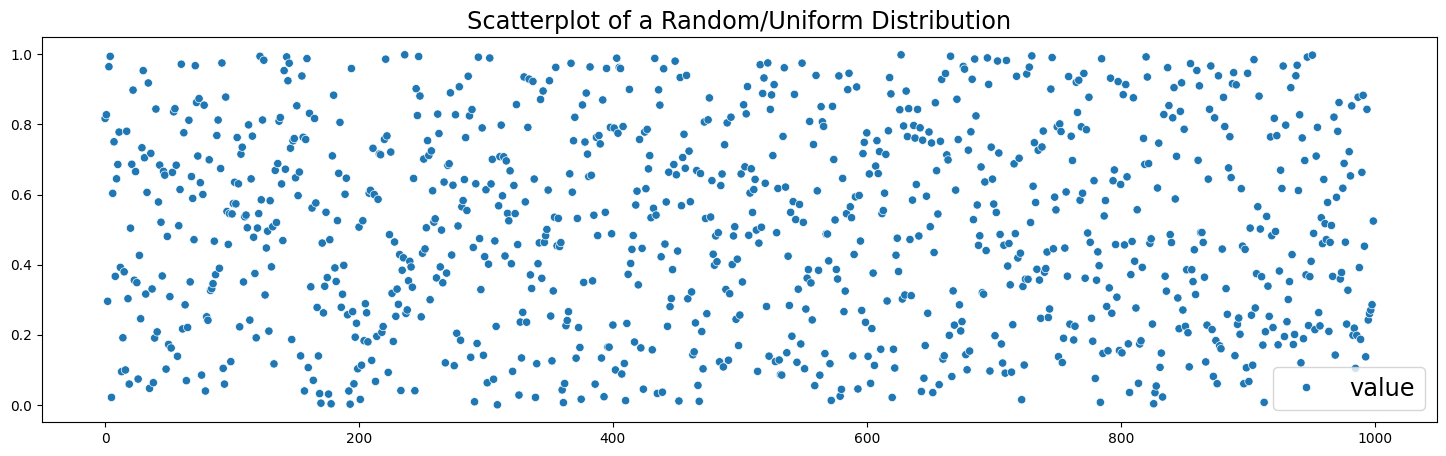

In [7]:
plt.figure(figsize=(18,5))
sns.scatterplot(data=uniform_df)
plt.legend(fontsize='xx-large')
plt.title('Scatterplot of a Random/Uniform Distribution', fontsize='xx-large')

C:\Users\kumar\AppData\Local\Temp\ipykernel_3780\1098536719.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(uniform_df)


Text(0.5, 1.0, 'Random/Uniform distribution')

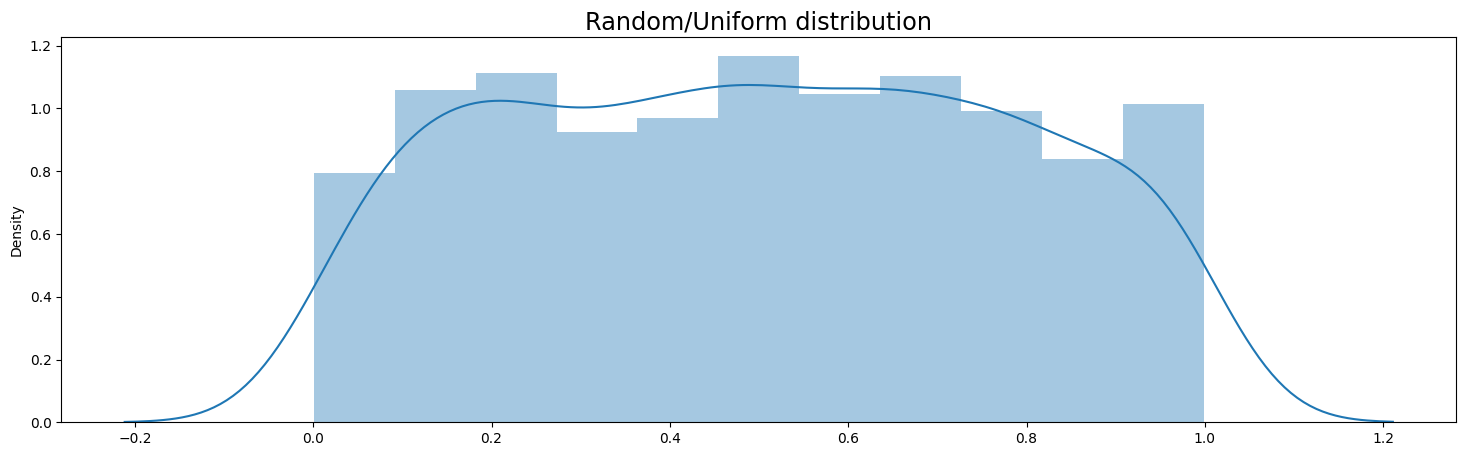

In [8]:
plt.figure(figsize=(18,5))
sns.distplot(uniform_df)
plt.title('Random/Uniform distribution', fontsize='xx-large')

### Normal Distribution

A normal distribution (also called Gaussian or Bell Curve) is very common and convenient. This is mainly because of the [Central Limit Theorem (CLT)](https://en.wikipedia.org/wiki/Central_limit_theorem), which states that with a large amount of independent random variables (like coin flips) the distribution tends towards a normal distribution.

PDF of a normal distribution:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/2ce7e315b02666699e0cd8ea5fb1a3e0c287cd9d)

CDF:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/187f33664b79492eedf4406c66d67f9fe5f524ea)


In [9]:
# Generate Normal Distribution
normal_dist = np.random.randn(10000)
normal_df = pd.DataFrame({'value' : normal_dist})
# Create a Pandas Series for easy sample function
normal_dist = pd.Series(normal_dist)

normal_dist2 = np.random.randn(10000)
normal_df2 = pd.DataFrame({'value' : normal_dist2})
# Create a Pandas Series for easy sample function
normal_dist2 = pd.Series(normal_dist)

normal_df_total = pd.DataFrame({'value1' : normal_dist, 
                                'value2' : normal_dist2})

Text(0.5, 1.0, 'Scatterplot of a Normal Distribution')

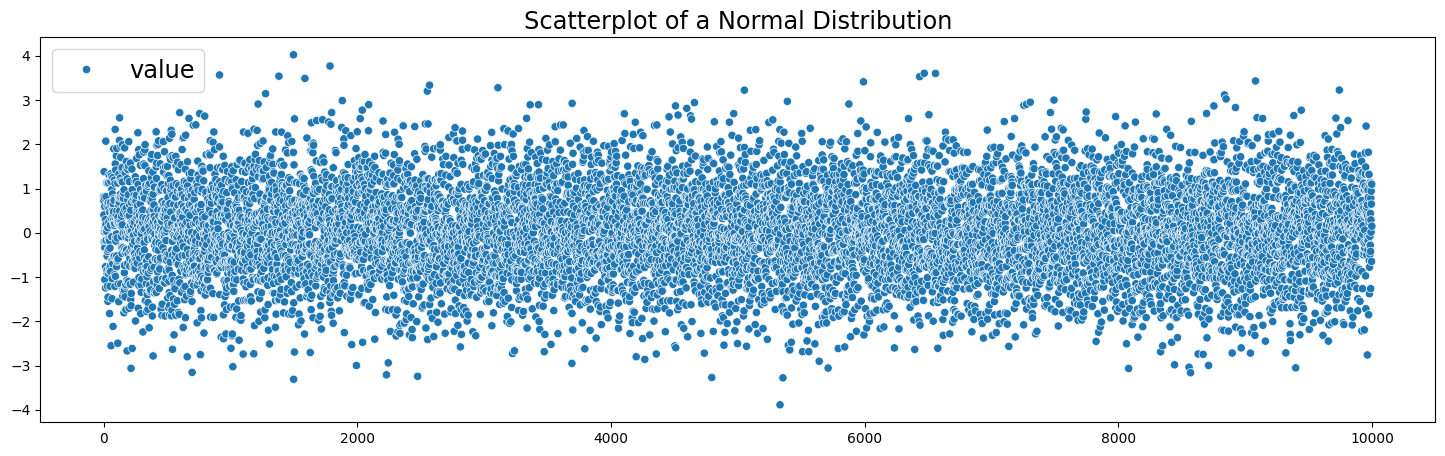

In [10]:
# Scatterplot
plt.figure(figsize=(18,5))
sns.scatterplot(data=normal_df)
plt.legend(fontsize='xx-large')
plt.title('Scatterplot of a Normal Distribution', fontsize='xx-large')

C:\Users\kumar\AppData\Local\Temp\ipykernel_3780\2492441267.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(normal_df)


Text(0.5, 1.0, 'Normal distribution (n=1000)')

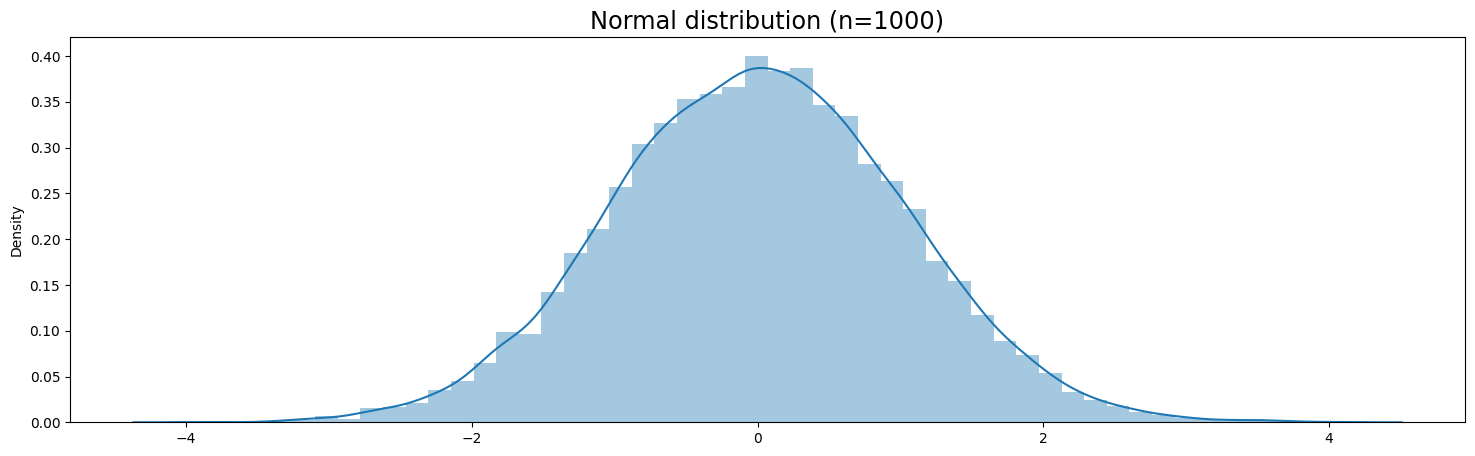

In [11]:
# Normal Distribution as a Bell Curve
plt.figure(figsize=(18,5))
sns.distplot(normal_df)
plt.title('Normal distribution (n=1000)', fontsize='xx-large')

### Binomial Distribution

A Binomial Distribution has a countable number of outcomes and is therefore discrete.

Binomial distributions must meet the following three criteria:

1. The number of observations or trials is fixed. In other words, you can only figure out the probability of something happening if you do it a certain number of times.
2. Each observation or trial is independent. In other words, none of your trials have an effect on the probability of the next trial.
3. The probability of success is exactly the same from one trial to another.

An intuitive explanation of a binomial distribution is flipping a coin 10 times. If we have a fair coin our chance of getting heads (p) is 0.50. Now we throw the coin 10 times and count how many times it comes up heads. In most situations we will get heads 5 times, but there is also a change that we get heads 9 times. The PMF of a binomial distribution will give these probabilities if we say N = 10 and p = 0.5. We say that the x for heads is 1 and 0 for tails.

PMF:

![](http://reliabilityace.com/formulas/binomial-pmf.png)

CDF:

![](http://reliabilityace.com/formulas/binomial-cpf.png)


A **Bernoulli Distribution** is a special case of a Binomial Distribution.

All values in a Bernoulli Distribution are either 0 or 1. 

For example, if we take an unfair coin which falls on heads 60 % of the time, we can describe the Bernoulli distribution as follows:

p (change of heads) = 0.6

1 - p (change of tails) = 0.4

heads = 1

tails = 0

Formally, we can describe a Bernoulli distribution with the following PMF (Probability Mass Function):

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/a9207475ab305d280d2958f5c259f996415548e9)


TypeError: annotate() missing 1 required positional argument: 'text'

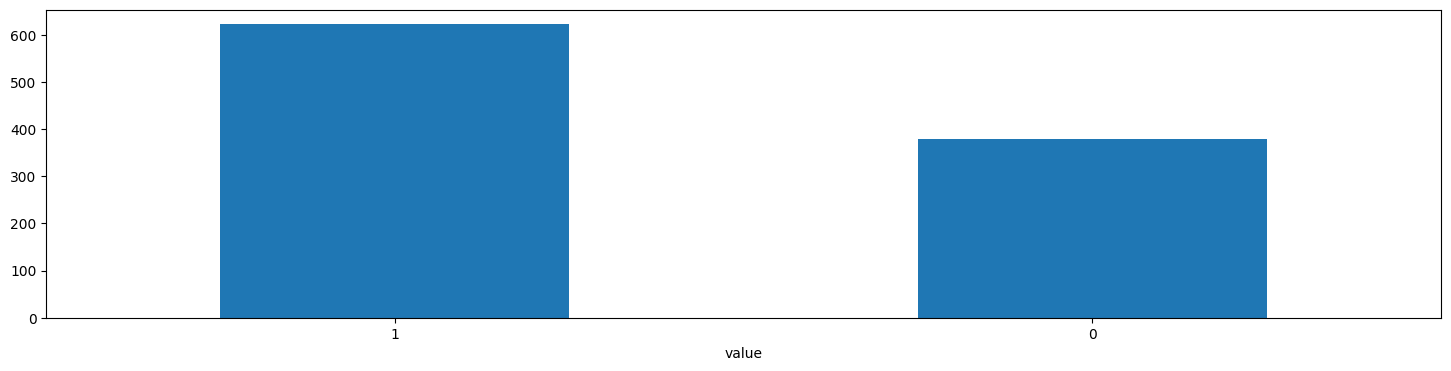

In [12]:
# Change of heads (outcome 1)
p = 0.6

# Create Bernoulli samples
bern_dist = bernoulli.rvs(p, size=1000)
bern_df = pd.DataFrame({'value' : bern_dist})
bern_values = bern_df['value'].value_counts()

# Plot Distribution
plt.figure(figsize=(18,4))
bern_values.plot(kind='bar', rot=0)
plt.annotate(xy=(0.85,300), 
             s='Samples that came up Tails\nn = {}'.format(bern_values[0]), 
             fontsize='large', 
             color='white')
plt.annotate(xy=(-0.2,300), 
             s='Samples that came up Heads\nn = {}'.format(bern_values[1]), 
             fontsize='large', 
             color='white')
plt.title('Bernoulli Distribution: p = 0.6, n = 1000')

In [13]:
bern_dist = bernoulli.rvs(p, size=1000)

### Poisson Distribution

The Poisson distribution is a discrete distribution and is popular for modelling the number of times an event occurs in an interval of time or space. 

It takes a value lambda, which is equal to the mean of the distribution.

PMF: 

![](https://study.com/cimages/multimages/16/poisson1a.jpg)

CDF: 
![](http://www.jennessent.com/images/cdf_poisson.gif)

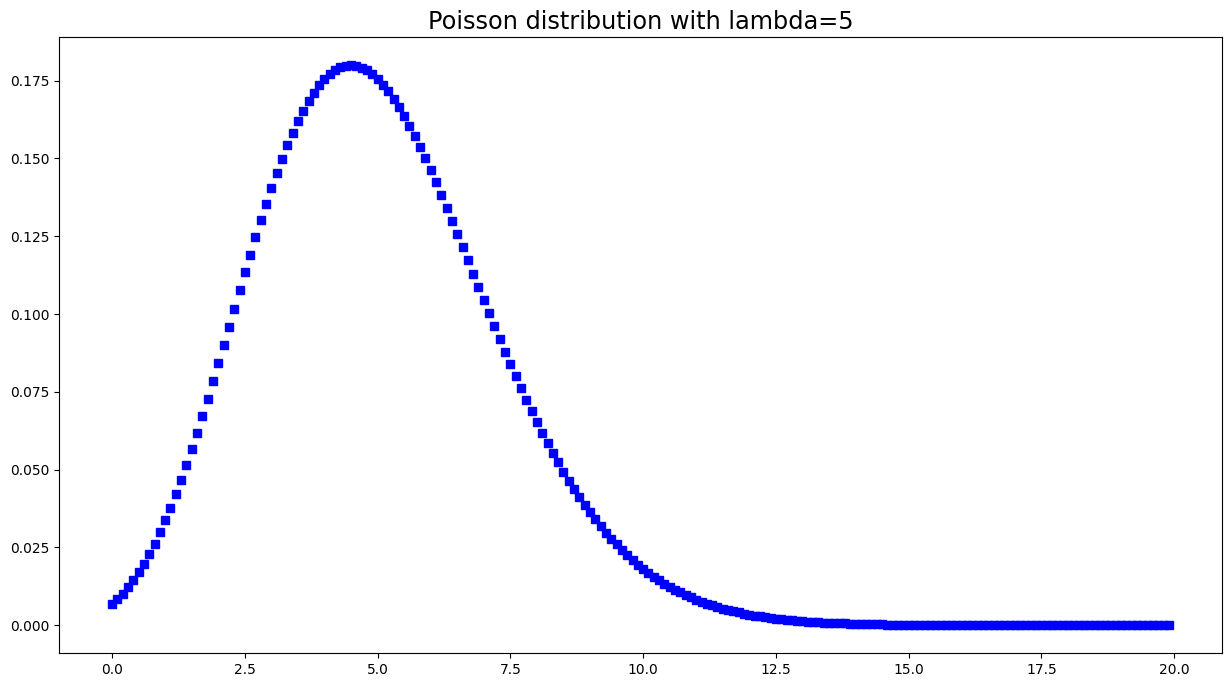

In [14]:
x = np.arange(0, 20, 0.1)
y = np.exp(-5)*np.power(5, x)/factorial(x)

plt.figure(figsize=(15,8))
plt.title('Poisson distribution with lambda=5', fontsize='xx-large')
plt.plot(x, y, 'bs')
plt.show()

### Log-Normal Distribution

A log-normal distribution is continuous. The main characteristic of a log-normal distribution is that it's logarithm is normally distributed. It is also referred to as Galton's distribution.

PDF: 

![](https://www.mhnederlof.nl/images/lognormaldensity.jpg)

CDF:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/29095d9cbd6539833d549c59149b9fc5bd06339b)

Where Phi is the CDF of the standard normal distribution.

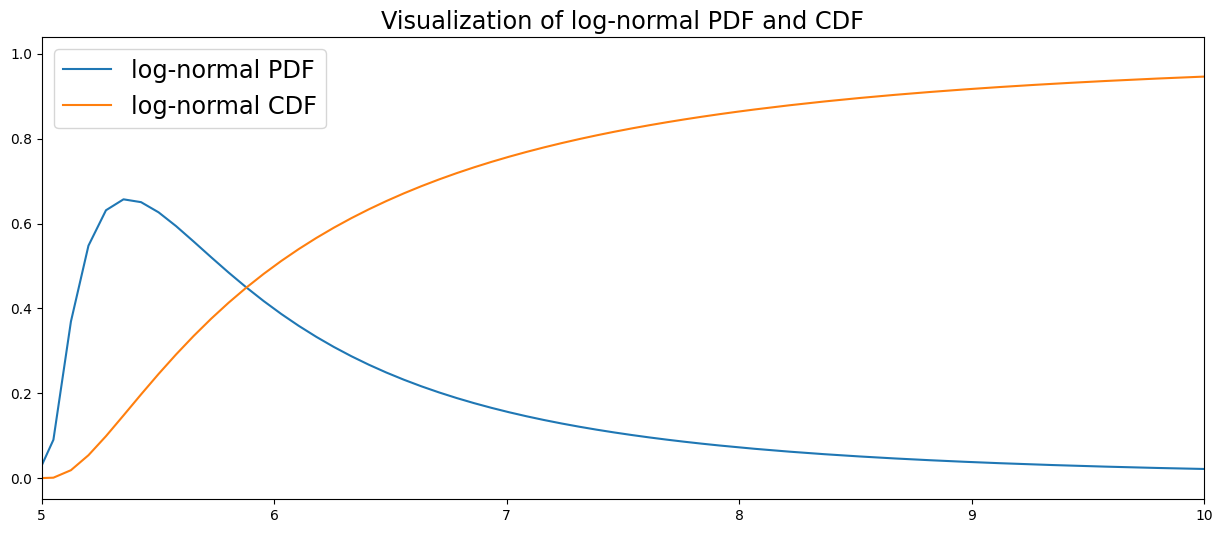

In [15]:
# Specify standard deviation and mean
std = 1
mean = 5

# Create log-normal distribution
dist=lognorm(std,loc=mean)
x=np.linspace(0,15,200)

# Visualize log-normal distribution
plt.figure(figsize=(15,6))
plt.xlim(5, 10)
plt.plot(x,dist.pdf(x), label='log-normal PDF')
plt.plot(x,dist.cdf(x), label='log-normal CDF')
plt.legend(fontsize='xx-large')
plt.title('Visualization of log-normal PDF and CDF', fontsize='xx-large')
plt.show()

## Summary Statistics and Moments <a id="4"></a>

**Mean, Median and Mode** 

Note: The mean is also called the first moment.


![](https://qph.fs.quoracdn.net/main-qimg-29a4925034e075f16e1c743a4b3dda8b)

### Moments

A moment is a quantitative measure that says something about the shape of a distribution. There are central moments and non-central moments. This section is focused on the central moments.

The 0th central moment is the total probability and is always equal to 1.

The 1st moment is the mean (expected value).

The 2nd central moment is the variance.

**Variance** = The average of the squared distance of the mean. Variance is interesting in a mathematical sense, but the standard deviation is often a much better measure of how spread out the distribution is.

![](http://www.visualmining.com/wp-content/uploads/2013/02/analytics_formula_variance.png)

**Standard Deviation** = The square root of the variance

![](http://www.visualmining.com/wp-content/uploads/2013/02/analytics_formula_std_dev.png)

The 3rd central moment is the skewness.

**Skewness** = A measure that describes the contrast of one tail versus the other tail. For example, if there are more high values in your distribution than low values then your distribution is 'skewed' towards the high values.

![](http://www.visualmining.com/wp-content/uploads/2013/02/analytics_formula_skewness.png)

The 4th central moment is the kurtosis.

**Kurtosis** = A measure of how 'fat' the tails in the distribution are.

![](http://www.visualmining.com/wp-content/uploads/2013/02/analytics_formula_kurtosis.png)

The higher the moment, the harder it is to estimate with samples. Larger samples are required in order to obtain good estimates.

In [16]:
# Summary
print('Summary Statistics for a normal distribution: ')
# Median
medi = median(normal_dist)
print('Median: ', medi)
display(normal_df.describe())

# Standard Deviation
std = sqrt(np.var(normal_dist))

print('The first four calculated moments of a normal distribution: ')
# Mean
mean = normal_dist.mean()
print('Mean: ', mean)

# Variance
var = np.var(normal_dist)
print('Variance: ', var)

# Return unbiased skew normalized by N-1
skew = normal_df['value'].skew()
print('Skewness: ', skew)

# Return unbiased kurtosis over requested axis using Fisher’s definition of kurtosis 
# (kurtosis of normal == 0.0) normalized by N-1
kurt = normal_df['value'].kurtosis()
print('Kurtosis: ', kurt)

Summary Statistics for a normal distribution: 
Median:  0.002688634640006354


,value
count,10000.000000
mean,0.008587
std,1.011393
min,-3.886374
25%,-0.683644
50%,0.002689
75%,0.688279
max,4.026299


The first four calculated moments of a normal distribution: 
Mean:  0.008586692732168546
Variance:  1.0228127260604556
Skewness:  0.02775161201599413
Kurtosis:  0.016309172609692446


## Bias, MSE and SE <a id="5"></a>

**Bias** is a measure of how far the sample mean deviates from the population mean. The sample mean is also called **Expected value**.

Formula for Bias:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/82a9c6501a54260ed0edd2f03923719b9f2db906)

The formula for expected value (EV) makes it apparent that the bias can also be formulated as the expected value minus the population mean:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/12828b1f927b39d2fa9d75f82c02b91209182911)

In [19]:
#Take sample
normal_df_sample = normal_df.sample(100)

# Calculate Expected Value (EV), population mean and bias
ev = normal_df_sample.mean()[0]
pop_mean = normal_df.mean()[0]
bias = ev - pop_mean

C:\Users\kumar\AppData\Local\Temp\ipykernel_3780\2254665813.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ev = normal_df_sample.mean()[0]
C:\Users\kumar\AppData\Local\Temp\ipykernel_3780\2254665813.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pop_mean = normal_df.mean()[0]


In [20]:
print('Sample mean (Expected Value): ', ev)
print('Population mean: ', pop_mean)
print('Bias: ', bias)

Sample mean (Expected Value):  -0.027894790271801372
Population mean:  0.008586692732168546
Bias:  -0.03648148300396992


**MSE (Mean Squared Error)** is a formula to measure how much estimators deviate from the true distribution. This can be very useful with for example, evaluating regression models.


![](https://i.stack.imgur.com/iSWyZ.png)


**RMSE (Root Mean Squared Error)** is just the root of the MSE.


![](http://file.scirp.org/Html/htmlimages/5-2601289x/fcdba7fc-a40e-4019-9e95-aca3dc2db149.png)



In [22]:
from math import sqrt

Y = 100 # Actual Value
YH = 94 # Predicted Value

# MSE Formula 
def MSE(Y, YH):
     return np.square(YH - Y).mean()

# RMSE formula
def RMSE(Y, YH):
    return sqrt(np.square(YH - Y).mean())


print('MSE: ', MSE(Y, YH))

print('RMSE: ', RMSE(Y, YH))

MSE:  36.0
RMSE:  6.0


The **Standard Error (SE)** measures how spread the distribution is from the sample mean.

![](http://desktopia.net/p/2018/07/standard-deviation-biology-for-life-in-standard-error-of-the-mean-formula.gif)

The formula can also be defined as the standard deviation divided by the square root of the number of samples.

![](https://toptipbio.com/wp-content/uploads/2017/07/Standard-error-formula.jpg)

In [23]:
# Standard Error (SE)
uni_sample = uniform_dist.sample(100)
norm_sample = normal_dist.sample(100)

print('Standard Error of uniform sample: ', sem(uni_sample))
print('Standard Error of normal sample: ', sem(norm_sample))

# The random samples from the normal distribution should have a higher standard error

Standard Error of uniform sample:  0.02784007454375023
Standard Error of normal sample:  0.11058336516023093


## Sampling methods <a id="6"></a>

**Non-Representative Sampling:**

Convenience Sampling = Pick samples that are most convenient, like the top of a shelf or people that can be easily approached.

Haphazard Sampling = Pick samples without thinking about it. This often gives the illusion take you are picking out samples at random. 

Purposive Sampling = Pick samples for a specific purpose. An example is to focus on extreme cases. This can be useful but is limited because it doesn't allow you to make statements about the whole population.

**Representative Sampling:**

Simple Random Sampling = Pick samples (psuedo)randomly.

Systematic Sampling = Pick samples with a fixed interval. For example every 10th sample (0, 10, 20, etc.).

Stratified Sampling = Pick the same amount of samples from different groups (strata) in the population.

Cluster Sampling = Divide the population into groups (clusters) and pick samples from those groups.

In [25]:
# Note that we take very small samples just to illustrate the different sampling methods

print('---Non-Representative samples:---\n')
# Convenience samples
con_samples = normal_dist[0:5]
print('Convenience samples:\n\n{}\n'.format(con_samples))

# Haphazard samples (Picking out some numbers)
hap_samples = [normal_dist[12], normal_dist[55], normal_dist[582], normal_dist[821], normal_dist[999]]
print('Haphazard samples:\n\n{}\n'.format(hap_samples))

# Purposive samples (Pick samples for a specific purpose)
# In this example we pick the 5 highest values in our distribution
purp_samples = normal_dist.nlargest(n=5)
print('Purposive samples:\n\n{}\n'.format(purp_samples))

print('---Representative samples:---\n')

# Simple (pseudo)random sample
rand_samples = normal_dist.sample(5)
print('Random samples:\n\n{}\n'.format(rand_samples))

# Systematic sample (Every 2000th value)
sys_samples = normal_dist[normal_dist.index % 2000 == 0]
print('Systematic samples:\n\n{}\n'.format(sys_samples))

# Stratified Sampling
# We will get 1 person from every city in the dataset
# We have 8 cities so that makes a total of 8 samples
df = pd.read_csv('toy_dataset.csv')

strat_samples = []

for city in df['City'].unique():
    samp = df[df['City'] == city].sample(1)
    strat_samples.append(samp['Income'].item())
    
print('Stratified samples:\n\n{}\n'.format(strat_samples))

# Cluster Sampling
# Make random clusters of ten people (Here with replacement)
c1 = normal_dist.sample(10)
c2 = normal_dist.sample(10)
c3 = normal_dist.sample(10)
c4 = normal_dist.sample(10)
c5 = normal_dist.sample(10)

# Take sample from every cluster (with replacement)
clusters = [c1,c2,c3,c4,c5]
cluster_samples = []
for c in clusters:
    clus_samp = c.sample(1)
    cluster_samples.extend(clus_samp)
print('Cluster samples:\n\n{}'.format(cluster_samples))    


---Non-Representative samples:---

Convenience samples:

0    0.817247
1    0.731286
2    0.404518
3   -0.216865
4    1.383308
dtype: float64

Haphazard samples:

[-0.1720172768957932, -0.8719702350080616, 0.9408331649256518, 0.7397447244314406, -1.678594620271283]

Purposive samples:

1497    4.026299
1785    3.771871
6470    3.608328
6559    3.605064
914     3.569358
dtype: float64

---Representative samples:---

Random samples:

7957   -0.209546
4629    2.039029
8171   -0.007602
5663   -1.439352
2388    0.157368
dtype: float64

Systematic samples:

0       0.817247
2000    2.285731
4000   -0.281910
6000    1.028539
8000    0.522775
dtype: float64

Stratified samples:

[35617.0, 91854.0, 99771.0, 136363.0, 82077.0, 73472.0, 84643.0, 97718.0]

Cluster samples:

[1.036447265131144, -1.1262088631830052, -0.09483667387202598, 1.5329225843744807, 0.9457229199856638]


## Covariance <a id="7"></a>

Covariance is a measure of how much two random variables vary together. variance is similar to covariance in that variance shows you how much one variable varies. Covariance tells you how two variables vary together.

If two variables are independent, their covariance is 0. However, a covariance of 0 does not imply that the variables are independent.

In [27]:
# Covariance between Age and Income
print('Covariance between Age and Income: ')

df[['Age', 'Income']].cov()

Covariance between Age and Income: 


,Age,Income
Age,133.922426,-3.811863e+02
Income,-381.186341,6.244752e+08


## Correlation <a id="8"></a>

Correlation is a standardized version of covariance. Here it becomes more clear that Age and Income do not have a strong correlation in our dataset.

The formula for Pearson's correlation coefficient consists of the covariance between the two random variables divided by the standard deviation of the first random variable times the standard deviation of the second random variable.

Formula for Pearson's correlation coefficient:

![](http://sherrytowers.com/wp-content/uploads/2013/09/correlation_xy-300x97.jpg)

In [28]:
# Correlation between two normal distributions
# Using Pearson's correlation
print('Pearson: ')
print(df[['Age', 'Income']].corr(method='pearson'))

# Negatively correlated data
x1 = [1, 3, 3, 4, 6, 7, 7, 9, 10, 10]
x2 = [9.7, 9.3, 7, 6, 7, 7.2, 6, 4.2, 4.5, 4]

# Positively correlated data
y1 = [0, 1, 2, 2.3, 3, 4, 4, 7, 9, 9.5]
y2 = [2.2, 4, 3, 5, 5.3, 5, 7, 9, 5, 10]

# Correlation with NumPy
print('\nx1,x2 correlation: \n', np.corrcoef(x1, x2))
print('\ny1,y2 correlation: \n', np.corrcoef(y1, y2))

Pearson: 
             Age    Income
Age     1.000000 -0.001318
Income -0.001318  1.000000

x1,x2 correlation: 
 [[ 1.         -0.88237093]
 [-0.88237093  1.        ]]

y1,y2 correlation: 
 [[1.        0.7737071]
 [0.7737071 1.       ]]


Another method for calculating a correlation coefficient is 'Spearman's Rho'. The formula looks different but it will give similar results as Pearson's method. In this example we see almost no difference, but this is partly because it is obvious that the Age and Income columns in our dataset have no correlation.

Formula for Spearmans Rho:

![](http://s3.amazonaws.com/hm_120408/fa/3d86/yhf5/9dwq/4m6e2kcav/original.jpg?1447778688)

In [29]:
# Using Spearman's rho correlation
print('Spearman: ')
df[['Age', 'Income']].corr(method='spearman')

Spearman: 


,Age,Income
Age,1.000000,-0.001452
Income,-0.001452,1.000000


## Linear regression <a id="9"></a>

Linear Regression can be performed through Ordinary Least Squares (OLS) or Maximum Likelihood Estimation (MLE).

Most Python libraries use OLS to fit linear models.

![](https://image.slidesharecdn.com/simplelinearregressionpelatihan-090829234643-phpapp02/95/simple-linier-regression-9-728.jpg?cb=1251589640)



TypeError: regplot() takes from 0 to 1 positional arguments but 2 were given

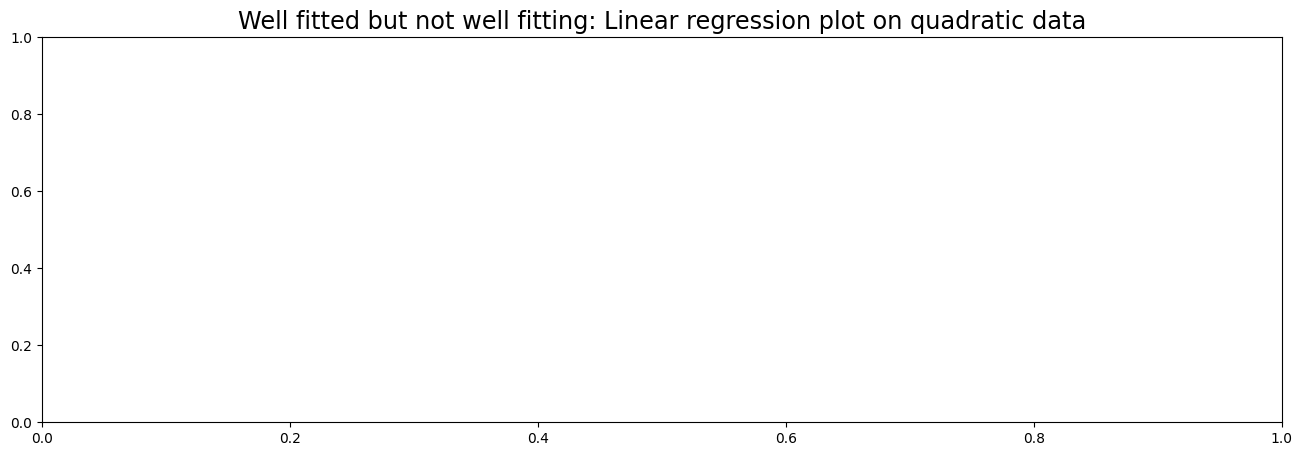

In [32]:
# Generate data
x = np.random.uniform(low=20, high=260, size=100)
y = 50000 + 2000*x - 4.5 * x**2 + np.random.normal(size=100, loc=0, scale=10000)

# Plot data with Linear Regression
plt.figure(figsize=(16,5))
plt.title('Well fitted but not well fitting: Linear regression plot on quadratic data', fontsize='xx-large')
sns.regplot(x,y)

Here we observe that the linear model is well-fitted. However, a linear model is probably not ideal for our data, because the data follows a quadratic pattern. A [polynomial regression model](https://en.wikipedia.org/wiki/Polynomial_regression) would better fit the data, but this is outside the scope of this tutorial.

We can also implement linear regression with a bare-bones approach. In the following example we measure the vertical distance and horizontal distance between a random data point and the regression line. 

For more information on implementing linear regression from scratch [I highly recommend this explanation by Luis Serrano](https://aitube.io/video/introduction-to-linear-regression).

Slope: 5.178332846585702
Intercept: -8.5955747021969


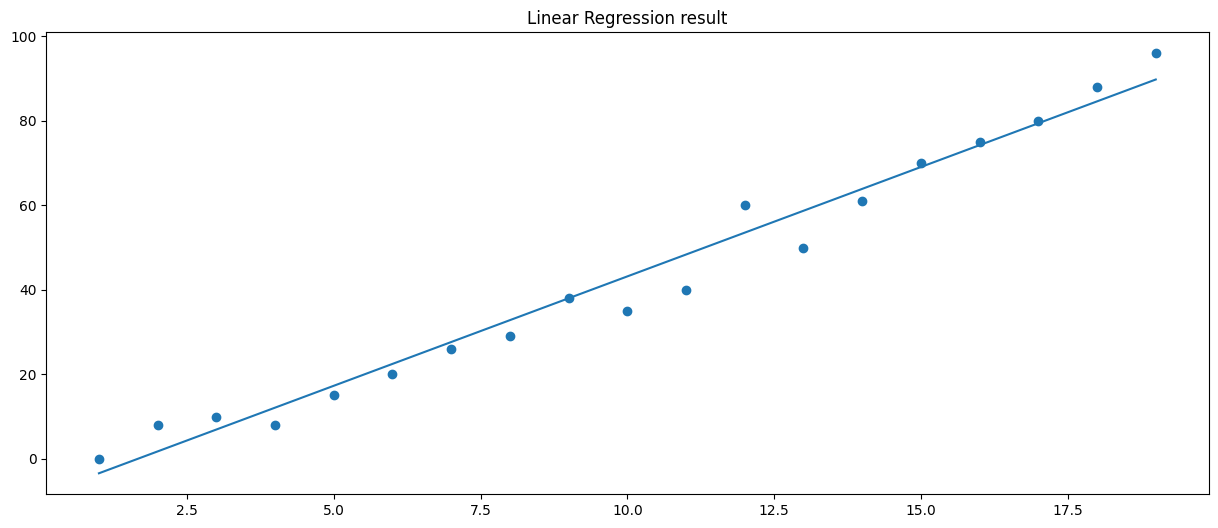

In [33]:
# Linear regression from scratch
import random
# Create data from regression
xs = np.array(range(1,20))
ys = [0,8,10,8,15,20,26,29,38,35,40,60,50,61,70,75,80,88,96]

# Put data in dictionary
data = dict()
for i in list(xs):
    data.update({xs[i-1] : ys[i-1]})

# Slope
m = 0
# y intercept
b = 0
# Learning rate
lr = 0.0001
# Number of epochs
epochs = 100000

# Formula for linear line
def lin(x):
    return m * x + b

# Linear regression algorithm
for i in range(epochs):
    # Pick a random point and calculate vertical distance and horizontal distance
    rand_point = random.choice(list(data.items()))
    vert_dist = abs((m * rand_point[0] + b) - rand_point[1])
    hor_dist = rand_point[0]

    if (m * rand_point[0] + b) - rand_point[1] < 0:
        # Adjust line upwards
        m += lr * vert_dist * hor_dist
        b += lr * vert_dist   
    else:
        # Adjust line downwards
        m -= lr * vert_dist * hor_dist
        b -= lr * vert_dist
        
# Plot data points and regression line
plt.figure(figsize=(15,6))
plt.scatter(data.keys(), data.values())
plt.plot(xs, lin(xs))
plt.title('Linear Regression result')  
print('Slope: {}\nIntercept: {}'.format(m, b))

The coefficients of a linear model can also be computed using MSE (Mean Squared Error) without an iterative approach. I implemented Python code for this technique as well. The code is in [the second cell of this Github repository](https://github.com/CarloLepelaars/linreg/blob/master/linreg_from_scratch.ipynb)

### Anscombe's Quartet

Anscombe's quartet is a set of four datasets that have the same descriptive statistics and linear regression fit. The datasets are however very different from each other.

This sketches the issue that although summary statistics and regression models are really helpful in understanding your data, you should always visualize the data to see whats really going on. It also shows that a few outliers can really mess up your model.

[More information on Anscombe's Quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)

![](https://www.researchgate.net/profile/Arch_Woodside2/publication/286454889/figure/fig3/AS:669434310037526@1536616985820/Anscombes-quartet-of-different-XY-plots-of-four-data-sets-having-identical-averages.png)

## Bootstrapping <a id="10"></a>

Bootstrapping is a resampling technique to quantify the uncertainty of an estimator given sample data. In other words, we have a sample of data and we take multiple samples from that sample. For example, with bootstrapping we can take means for each bootstrap sample and thereby make a distribution of means.

Once we created a distribution of estimators we can use this to make decisions. 

Bootstrapping can be:
1. Non-parametric (Take random samples from sample)
2. Parametric (Use the sample to create new datasets with a (normal) distribution which has sample mean and variance).
    Downside: You are making assumptions about the distribution.
    Upside: Computationally more light
3. Online bootstrap (Take samples from a stream of data)

The following code implements a simple non-parametric bootstrap to create a distribution of means, medians and midranges of the Income distribution in our Toy Dataset. We can use this to deduce which income means will make sense for subsequent samples.


Means of Bootstrap Samples: 
95256      88094.0
32667      99589.0
65335     101330.0
32732     104215.0
101207    104988.0
46544     105346.0
127333     70017.0
99922      87127.0
115273    138581.0
27170     104115.0
Name: Income, dtype: float64

Mean of the population:  91638.0744
Standard Deviation of the population:  25122.158855871035


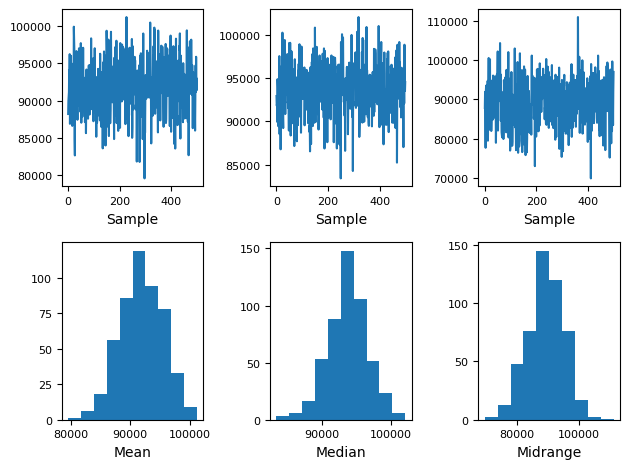

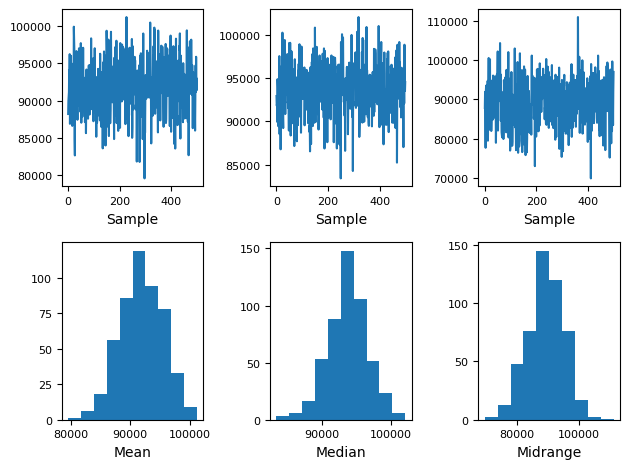

In [34]:
# scikit-learn bootstrap package
from sklearn.utils import resample

# data sample
data = df['Income'].sample(10000)

# prepare bootstrap samples
boot = resample(data, replace=True, n_samples=10, random_state=1)
print('Means of Bootstrap Samples: \n{}\n'.format(boot))
print('Mean of the population: ', data.mean())
print('Standard Deviation of the population: ', data.std())

# Bootstrap plot
pd.plotting.bootstrap_plot(data)

## Hypothesis testing <a id="11"></a>

We establish two hypotheses, H0 (Null hypothesis) and Ha (Alternative Hypothesis). 

We can make four different decisions with hypothesis testing:
1. Reject H0 and H0 is not true (no error)
2. Do not reject H0 and H0 is true (no error)
3. Reject H0 and H0 is true (Type 1 Error)
4. Do not reject H0 and H0 is not true (Type 2 error)

Type 1 error is also called Alpha error.
Type 2 error is also called Beta error.

![](https://qph.fs.quoracdn.net/main-qimg-84121cf5638cbb5919999b2a8d928c91)

![](https://i.stack.imgur.com/x1GQ1.png)

### P-Value

A p-value is the probability of finding equal or more extreme results when the null hyptohesis (H0) is true. In other words, a low p-value means that we have compelling evidence to reject the null hypothesis.

If the p-value is lower than 5% (p < 0.05). We often reject H0 and accept Ha is true. We say that p < 0.05 is statistically significant, because there is less than 5% chance that we are wrong in rejecting the null hypothesis.

One way to calculate the p-value is through a T-test. We can use [Scipy's ttest_ind function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) to calculate the t-test for the means of two independent samples of scores. In this example we calculate the t-statistic and p-value of two random samples 10 times. 

We see that the p-value is sometimes very low, but this does not mean that these two random samples are correlated. This is why you have to be careful with relying too heavily of p-values. If you repeat an experiment multiple times you can get trapped in the illusion that there is correlation where there is only randomness.

[This xkcd comic perfectly illustrates the hazards of relying too much on p-values](https://xkcd.com/882/).

In [35]:
# Perform t-test and compute p value of two random samples
print('T-statistics and p-values of two random samples.')
for _ in range(10):
    rand_sample1 = np.random.random_sample(10)
    rand_sample2 = np.random.random_sample(10)
    print(stats.ttest_ind(rand_sample1, rand_sample2))

T-statistics and p-values of two random samples.
TtestResult(statistic=-0.4914993519457263, pvalue=0.6290129104120783, df=18.0)
TtestResult(statistic=-1.5607927118021412, pvalue=0.13598197752032412, df=18.0)
TtestResult(statistic=0.6774073750284579, pvalue=0.5067616380993112, df=18.0)
TtestResult(statistic=-0.49948666764720673, pvalue=0.6234868293567553, df=18.0)
TtestResult(statistic=0.9628353599757439, pvalue=0.34838771130581403, df=18.0)
TtestResult(statistic=-1.2728890634886447, pvalue=0.2192530896290588, df=18.0)
TtestResult(statistic=0.05056122906425335, pvalue=0.960232011021139, df=18.0)
TtestResult(statistic=1.9473638926725636, pvalue=0.06726384983384336, df=18.0)
TtestResult(statistic=0.6188750520220309, pvalue=0.5437522556652401, df=18.0)
TtestResult(statistic=0.39018710480636115, pvalue=0.7009770381194458, df=18.0)


### q-q plot (quantile-quantile plot)

Many statistical techniques require that data is coming from a normal distribution (for example, t-test). Therefore, it is important to verify this before applying statistical techniques.

One approach is to visualize and make a judgment about the distribution. A q-q plot is very helpful for determining if a distribution is normal. There are other tests for testing 'normality', but this is beyond the scope of this tutorial.

In the first plot we can easily see that the values line up nicely. From this we conclude that the data is normally distributed.

In the second plot we can see that the values don't line up. Our conclusion is that the data is not normally distributed. In this case the data was uniformly distributed.


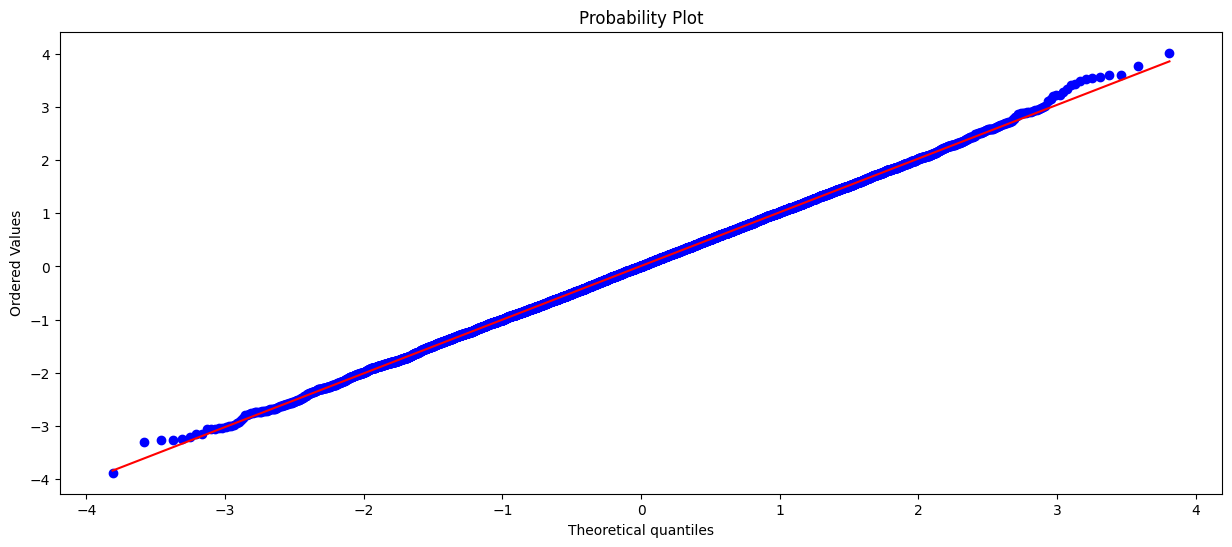

In [36]:
# q-q plot of a normal distribution
plt.figure(figsize=(15,6))
stats.probplot(normal_dist, dist="norm", plot=plt)
plt.show()

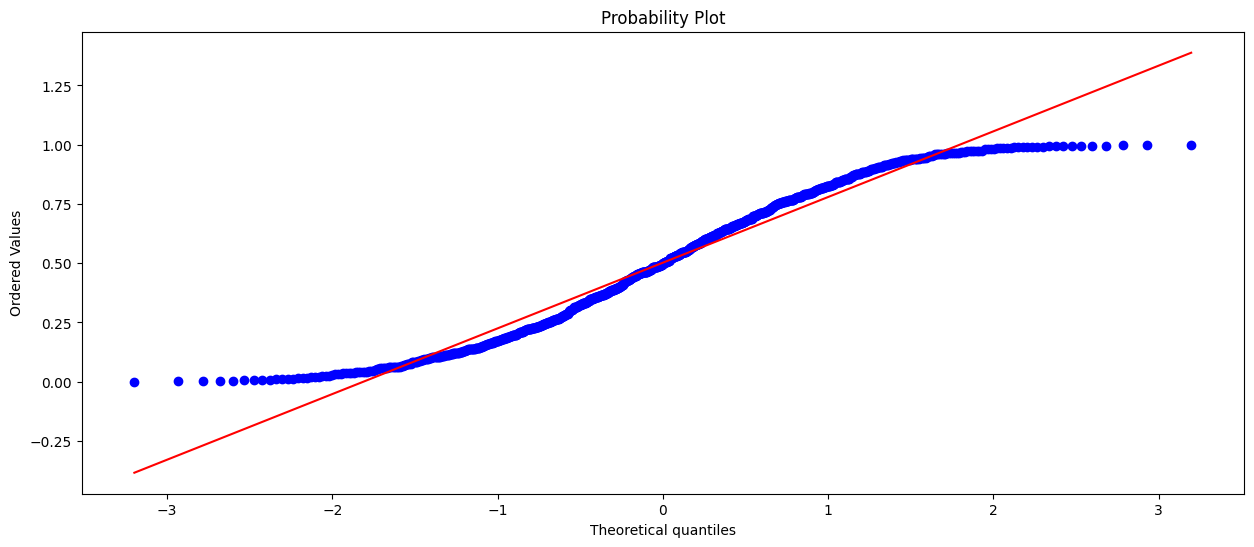

In [37]:
# q-q plot of a uniform/random distribution
plt.figure(figsize=(15,6))
stats.probplot(uniform_dist, dist="norm", plot=plt) 
plt.show()

## Outliers <a id="12"></a>

An outlier is an observation which deviates from other observations. An outlier often stands out and could be an error.

Outliers can mess up you statistical models. However, outliers should only be removed when you have established good reasons for removing the outlier.

Sometimes the outliers are the main topic of interest. This is for example the case with fraud detection. There are many outlier detection methods, but here we will discuss Grubbs test and Tukey’s method. Both tests assume that the data is normally distributed.

### Grubbs Test

In Grubbs test, the null hypothesis is that no observation is an outlier, while the alternative hypothesis is that there is one observation an outlier. Thus the Grubbs test is only searching for one outlier observation.

The formula for Grubbs test:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/bafc310f1dbca658728c73256fed19b6a7f11130)

Where Y_hat is the sample mean and s is the standard deviation. The Grubbs test statistic is the largest absolute deviation from the sample mean in units of the sample standard deviation.

[Source](https://en.wikipedia.org/wiki/Grubbs%27_test_for_outliers)

### Tukey's method

Tukey suggested that an observation is an outlier whenever an observation is 1.5 times the interquartile range below the first quartile or 1.5 times the interquartile range above the third quartile. This may sound complicated, but is quite intuitive if you see it visually.

For normal distributions, Tukey’s criteria for outlier observations is unlikely if no outliers are present, but using Tukey’s criteria for other distributions should be taken with a grain of salt.

The formula for Tukey's method:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/2a103bbd9233d9f8f711a7c76dfeb9694446f860)

Ya is the larger of two means being compared. SE is the standard error of the sum of the means.

[Source](https://en.wikipedia.org/wiki/Tukey%27s_range_test)

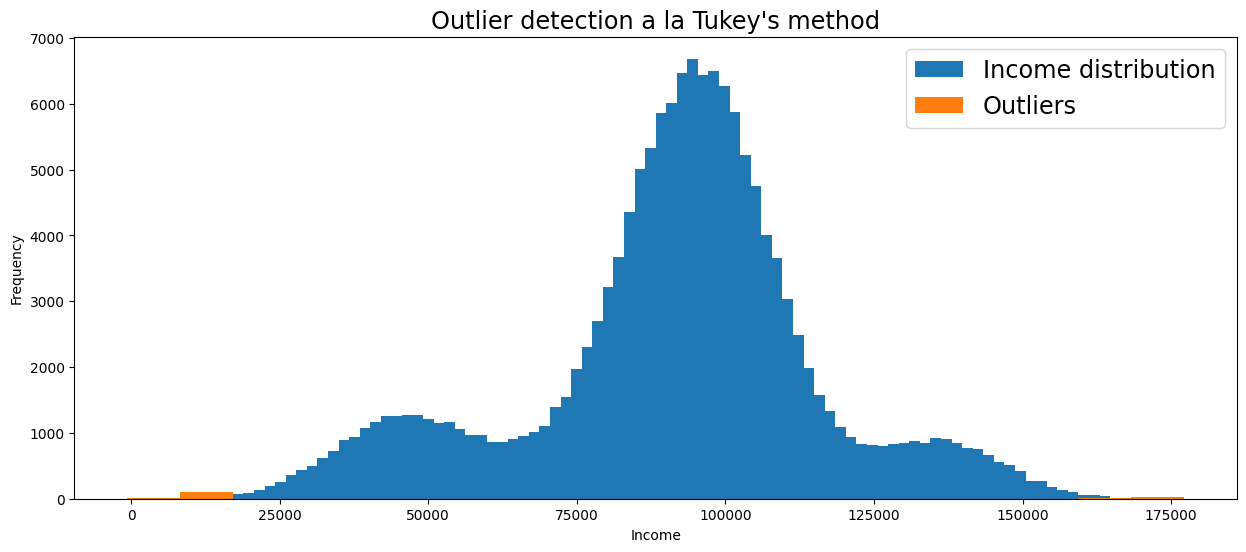

In [38]:
# Detect outliers on the 'Income' column of the Toy Dataset

# Function for detecting outliers a la Tukey's method using z-scores
def tukey_outliers(data) -> list:
    # For more information on calculating the threshold check out:
    # https://medium.com/datadriveninvestor/finding-outliers-in-dataset-using-python-efc3fce6ce32
    threshold = 3
    
    mean = np.mean(data)
    std = np.std(data)
    
    # Spot and collect outliers
    outliers = []
    for i in data:
        z_score = (i - mean) / std
        if abs(z_score) > threshold:
            outliers.append(i)
    return outliers

# Get outliers
income_outliers = tukey_outliers(df['Income'])

# Visualize distribution and outliers
plt.figure(figsize=(15,6))
df['Income'].plot(kind='hist', bins=100, label='Income distribution')
plt.hist(income_outliers, bins=20, label='Outliers')
plt.title("Outlier detection a la Tukey's method", fontsize='xx-large')
plt.xlabel('Income')
plt.legend(fontsize='xx-large')

## Overfitting <a id="20"></a>

Our model is overfitting if it is also modeling the 'noise' in the data. This implies that the model will not generalize well to new data even though the error on the training data becomes very small. Linear models are unlikely to overfit, but as models become more flexible we have to be wary of overfitting. Our model can also underfit which means that it has a large error on the training data. 

Finding the sweet spot between overfitting and underfitting is called the [Bias Variance Trade-off](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff). It is nice to know this theorem, but more important to understand how to prevent it. I will explain some techniques for how to do this below.

### Prevention of Overfitting

1. Split data into training data and test data.
2. Regularization: limit the flexibility of the model.
3. Cross Validation

### Cross Validation

Cross validation is a technique to estimate the accuracy of our statistical model. It is also called out-of-sample testing or rotation estimation. Cross validation will help us to recognize overfitting and to check if our model generalizes to new (out-of-sample) data.

A popular cross validation technique is called k-fold cross validation. The idea is simple, we split our dataset up in k datasets and out of each dataset k we pick out a few samples. We then fit our model on the rest of k and try to predict the samples we picked out. We use a metric like Mean Squared Error to estimate how good our predictions are. This procedure is repeated and then we look at the average of the predictions over multiple cross-validation data sets. 

A special case where we pick out one samples is called 'Leave-One-Out Cross Validation (LOOCV)'. However, the variance of LOOCV is high.

For more information about cross validation [check out this blog](https://machinelearningmastery.com/k-fold-cross-validation/).



## Generalized Linear Models (GLMs) <a id="13"></a>

### Link functions

A Link Function is used in Generalized Linear Models (GLMs) to apply linear models for a continuous response variable given continuous and/or categorical predictors. A link function that is often used is called the inverse logit or logistic sigmoid function.

The link function provides a relationship between the linear predictor and the mean of a distribution.

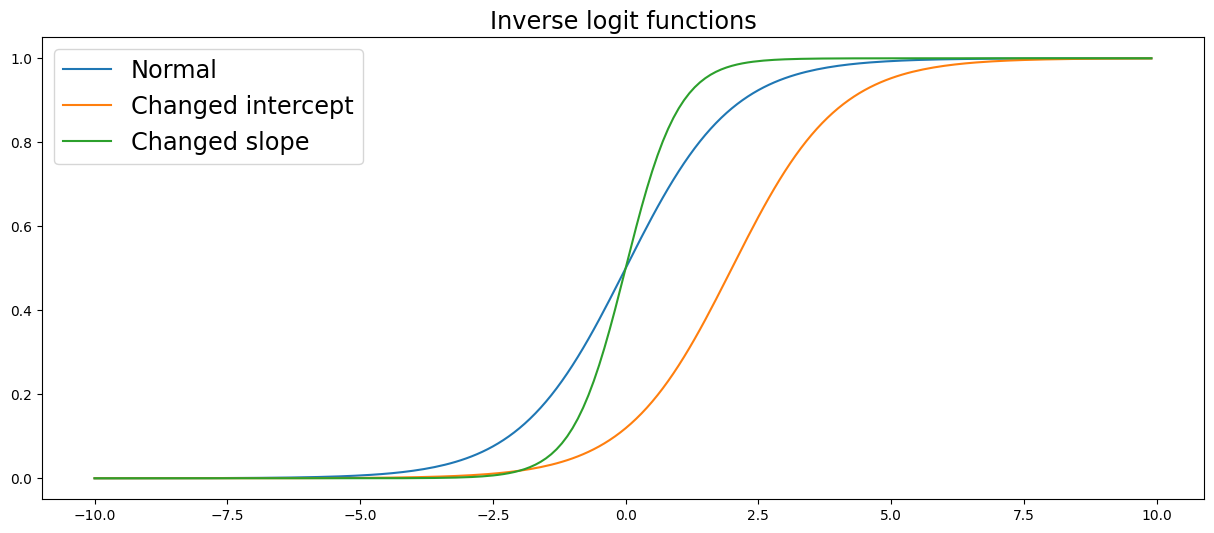

In [39]:
# Inverse logit function (link function)
def inv_logit(x):
    return 1 / (1 + np.exp(-x))

t1 = np.arange(-10, 10, 0.1)
plt.figure(figsize=(15,6))
plt.plot(t1, inv_logit(t1), 
         t1, inv_logit(t1-2),   
         t1, inv_logit(t1*2))
plt.title('Inverse logit functions', fontsize='xx-large')
plt.legend(('Normal', 'Changed intercept', 'Changed slope'), fontsize='xx-large')

### Logistic regression

With logistic regression we use a link function like the inverse logit function mentioned above to model a binary dependent variable. While a linear regression model predicts the expected value of y given x directly, a GLM uses a link function. 

We can easily implement logistic regression with [sklearn's Logistic Regression function.](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [41]:
# Simple example of Logistic Regression in Python
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

# Logistic regression classifier
clf = LogisticRegression(random_state=0, 
                         solver='lbfgs',
                         multi_class='multinomial').fit(X, y)

print('Accuracy score of logistic regression model on the Iris flower dataset: {}'.format(clf.score(X, y)))

Accuracy score of logistic regression model on the Iris flower dataset: 0.9733333333333334


C:\Users\kumar\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\kumar\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Frequentist vs. Bayes <a id="14"></a>

Frequentist:

1. Fixed parameters (Processes are fixed)
2. Repeated sampling leads to Probabilities

Bayes:

1. Probability as "degree of belief"
2. P(parameter) leads to all plausible values of the parameter
3. Updates degree of belief based on a prior belief


Frequentists and Bayesians agree that Bayes' Theorem is valid. See figure below for explanation of this theorem.

![](https://cdn-images-1.medium.com/max/1600/1*LB-G6WBuswEfpg20FMighA.png)


Bayes theorem extends to distributions and random variables.


# The end!

## Bonus: Free statistics courses <a id="15"></a>

There is a lot of free material online for people who want to dive deeper into statistics. Here is a selection from the Internet.

Udacity's "Intro to Statistics": https://eu.udacity.com/course/intro-to-statistics--st101

Udacity's "Intro to Descriptive Statistics": https://eu.udacity.com/course/intro-to-descriptive-statistics--ud827

Udacity's "Intro to Inferential Statistics": https://eu.udacity.com/course/intro-to-inferential-statistics--ud201

edX's "Introduction to Probability - The Science of Uncertainty" : https://www.edx.org/course/introduction-probability-science-mitx-6-041x-2

Khan Academy's videos on statistics and probability: https://www.khanacademy.org/math/statistics-probability

(Kaggle Kernel) Mathematics of Linear Regression by Nathan Lauga: https://www.kaggle.com/nathanlauga/mathematics-of-linear-regression

## Sources <a id="16"></a>

https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python

https://www.statisticshowto.datasciencecentral.com/discrete-variable/

https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/binomial-theorem/binomial-distribution-formula/

https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/descriptive-statistics/sample-variance/

https://machinelearningmastery.com/a-gentle-introduction-to-the-bootstrap-method

https://machinelearningmastery.com/k-fold-cross-validation/

https://en.wikipedia.org/wiki/Poisson_distribution

https://www.tutorialspoint.com/python/python_p_value.htm

https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f

https://www.slideshare.net/dessybudiyanti/simple-linier-regression

https://www.youtube.com/channel/UCgBncpylJ1kiVaPyP-PZauQ